In [31]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [33]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [34]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [36]:
filepath = "..\data\processed\CATEG_1.csv"
df = pd.read_csv(filepath).sort_values(by = ["DATE"])
df.head(3)

,DATE,UNITS_SOLD
510,2018-10-16,1
164,2019-06-11,27
514,2019-06-12,26


In [37]:
len(df)

887

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 510 to 473
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        887 non-null    object
 1   UNITS_SOLD  887 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 20.8+ KB


In [6]:
ts_delhi = df[['DATE','UNITS_SOLD']]
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi.index = pd.to_datetime(ts_delhi['DATE'], format='%Y-%m-%d')
ts_delhi = ts_delhi[ts_delhi.index > "2019-07-01"]
ts_delhi = ts_delhi.drop(["DATE"], axis = 1)


In [7]:
ts_delhi

,UNITS_SOLD
DATE,
2019-07-02,32
2019-07-03,27
2019-07-04,30
2019-07-05,23
2019-07-06,19
...,...
2021-11-08,63
2021-11-09,65
2021-11-10,189


In [8]:
ts_delhi.index.min(), ts_delhi.index.max()

(Timestamp('2019-07-02 00:00:00'), Timestamp('2021-11-12 00:00:00'))

In [9]:
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()

UNITS_SOLD    0
dtype: int64

In [10]:
ts_month_avg = ts_delhi['UNITS_SOLD'].resample('MS').mean()


In [11]:
len(ts_month_avg)

29

In [12]:
ts_month_avg = ts_month_avg.dropna()
ts_month_avg

DATE
2019-07-01     24.333333
2019-08-01     24.000000
2019-09-01     21.200000
2019-10-01     18.354839
2019-11-01     50.500000
2019-12-01     74.419355
2020-01-01     36.419355
2020-02-01     24.448276
2020-03-01     27.096774
2020-04-01     51.033333
2020-05-01     76.225806
2020-06-01     66.633333
2020-07-01     67.516129
2020-08-01     50.967742
2020-09-01     50.500000
2020-10-01     39.225806
2020-11-01     97.766667
2020-12-01    131.774194
2021-01-01     80.419355
2021-02-01     85.321429
2021-03-01     63.161290
2021-04-01     53.233333
2021-05-01     58.870968
2021-06-01     43.933333
2021-07-01     52.870968
2021-08-01     48.032258
2021-09-01     43.300000
2021-10-01     38.677419
2021-11-01     81.916667
Freq: MS, Name: UNITS_SOLD, dtype: float64

In [13]:
# df = ts_month_avg.to_frame()
# # df = df.drop([3])
# df.index

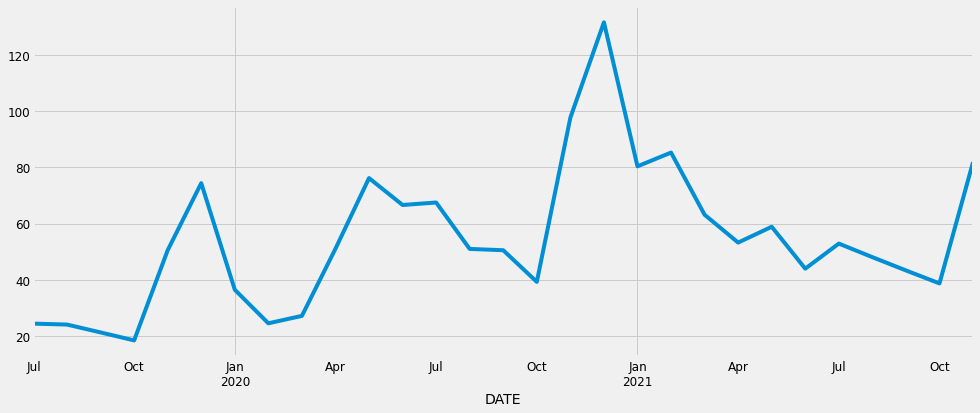

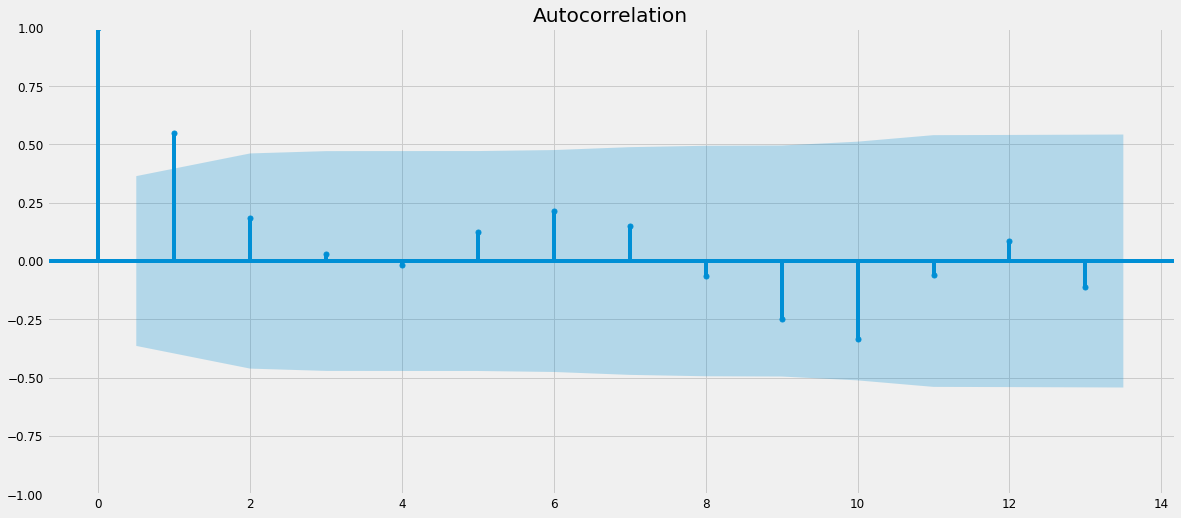

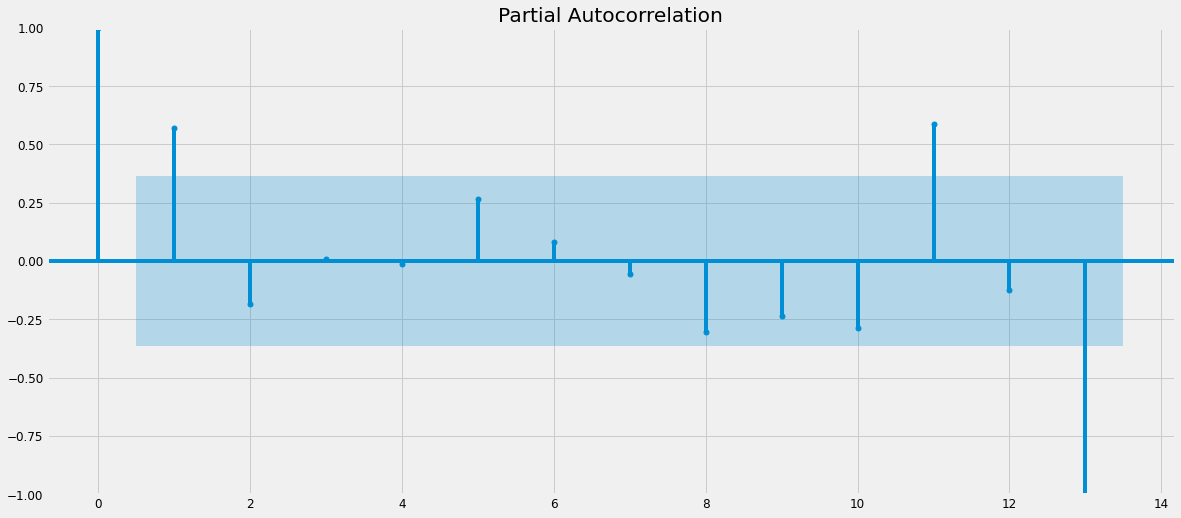

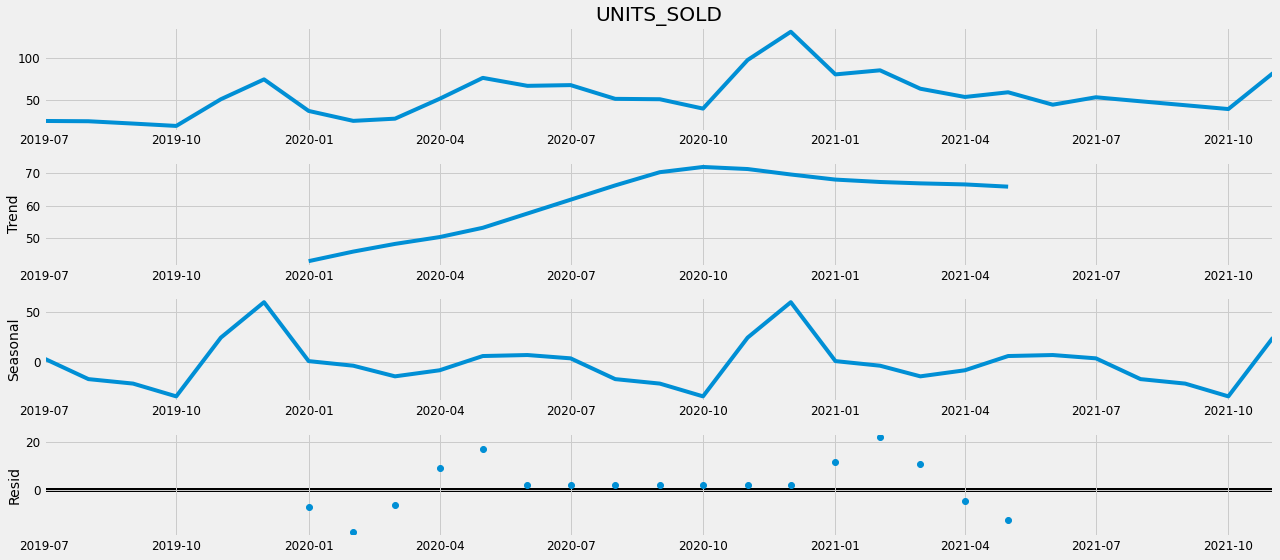

In [15]:
ts_month_avg.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_month_avg, lags=13)
matplotlib.pyplot.show()
plot_pacf(ts_month_avg, lags=13)
matplotlib.pyplot.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
#apply adf test on the series
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -2.663760
p-value                         0.080522
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.352851
p-value                  0.097478
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


<AxesSubplot:xlabel='DATE'>

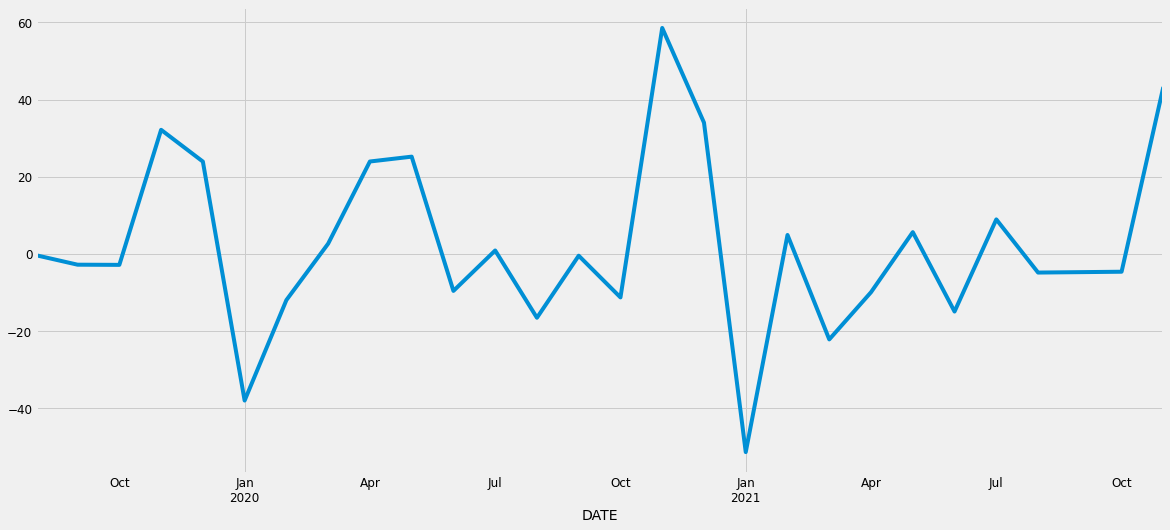

In [17]:
ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

In [18]:
len(ts_t_adj)

28

In [19]:
#apply adf test on the series
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                 -3.012381
p-value                         0.033754
#Lags Used                      9.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64
None


<AxesSubplot:xlabel='DATE'>

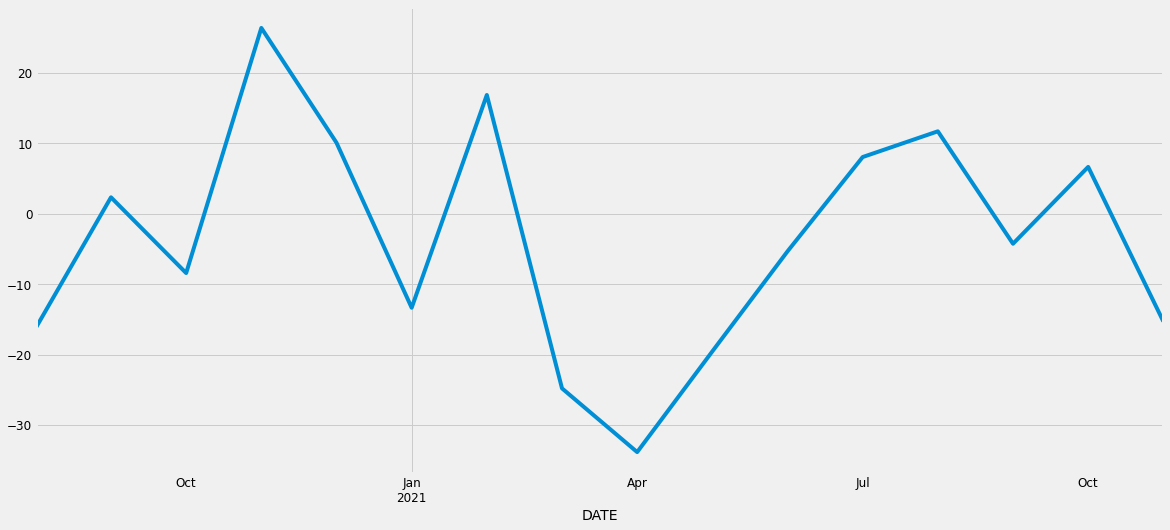

In [20]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

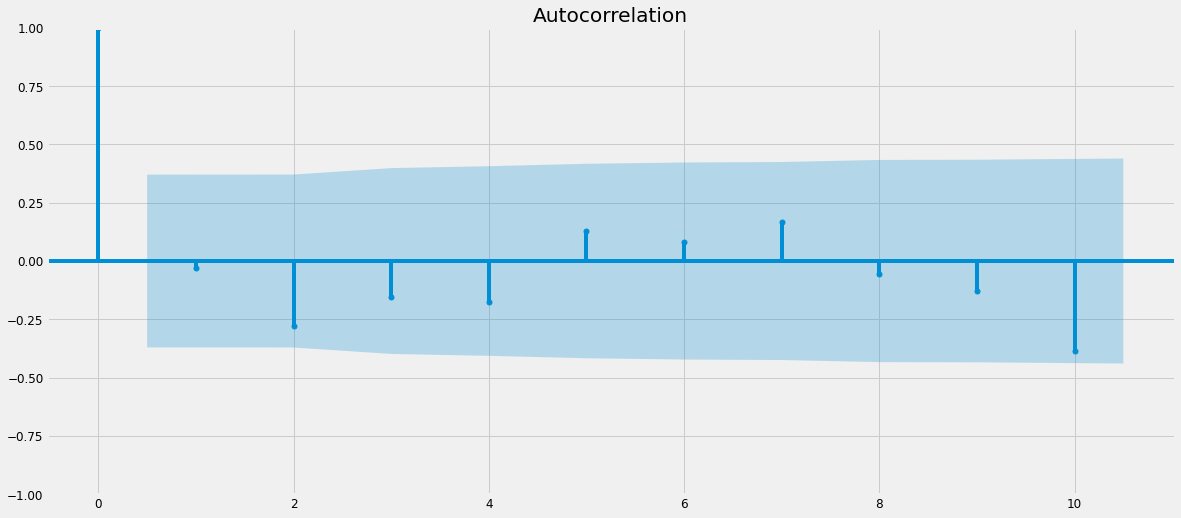

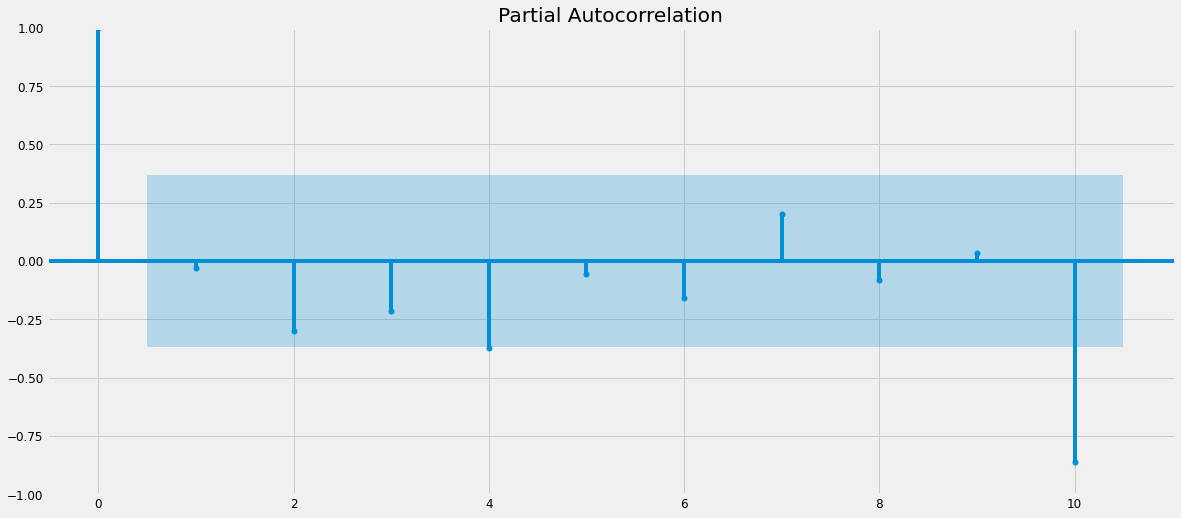

In [26]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj, lags=10)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 10)
matplotlib.pyplot.show()

In [27]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 0.959369
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:32.69980214845438
Optimization terminated successfully.
         Current function value: 0.959280
         Iterations: 2
         Function evaluations: 80
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:34.6969554893564
Optimization terminated successfully.
         Current function value: 0.959472
         Iterations: 2
         Function evaluations: 135
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:36.70311536792617
Optimization terminated successfully.
         Current function value: 0.959479
         Iterations: 2
         Function evaluations: 166
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:38.70333293256962
Optimization terminated successfully.
         Current function value: 0.959266
         Iterations: 2
         Function evaluations: 43
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:34.69652013492985
Optimization terminated successfully.
 

In [29]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.949806
         Iterations: 2
         Function evaluations: 192
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    413.670     -0.002      0.998    -811.778     809.778
ar.S.L12      -0.3559    449.954     -0.001      0.999    -882.250     881.538
ar.S.L24   -1.029e-06    160.144  -6.43e-09      1.000    -313.876     313.876
sigma2       812.7644      0.509   1596.930      0.000     811.767     813.762


In [30]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1296x576 with 0 Axes>

__ValueError__: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_s_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))